In [2]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from os import path
import matplotlib.image as mpimg


# Directory where data is stored
DATA_DIR = '../resources/code-soccer-files-main/data'
FIG_DIR = '../resources/code-soccer-files-main/figures'

Distributions

In [5]:
dfs = pd.read_csv(path.join(DATA_DIR, 'shots.csv'))
dfpm = pd.read_csv(path.join(DATA_DIR, 'player_match.csv'))
dfm = pd.read_csv(path.join(DATA_DIR, 'matches.csv'))
dfp = pd.read_csv(path.join(DATA_DIR, 'players.csv'))
dft = pd.read_csv(path.join(DATA_DIR, 'teams.csv'))
dftm = pd.read_csv(path.join(DATA_DIR, 'team_match.csv'))

# processing
dfpm = pd.merge(dfpm, dfm[['match_id', 'home_team', 'away_team']], how='left')
dfpm['opp'] = np.nan
dfpm.loc[dfpm['team'] == dfpm['home_team'], 'opp'] = dfpm['away_team']
dfpm.loc[dfpm['team'] == dfpm['away_team'], 'opp'] = dfpm['home_team']

dfp = pd.merge(dfp, dft[['team_id', 'grouping']], how='left')

dfs['min_period'] = dfs['time'] // 60

dfs = pd.merge(dfs, dft[['team_id', 'team']], how='left')

dfs.head()

,name,foot,goal,dist_m,dist_ft,time,match_id,period,team_id,player_id,...,x2,y2,H1,H2,E1,shot_loc_desc,time2,min,min_period,team
0,A. Samedov,right,False,12.987566,42.599215,407.123899,2057954,1H,14358,101699,...,0,0,2819.15327,2983.382036,NaN,NaN,407.123899,6.0,6.0,Russia
1,Yasir Al Shahrani,right,False,16.559476,54.315080,327.142941,2057954,1H,16521,122940,...,100,100,2819.15327,2983.382036,NaN,NaN,327.142941,5.0,5.0,Saudi Arabia
2,Y. Zhirkov,left,False,17.013624,55.804687,526.276996,2057954,1H,14358,101857,...,0,0,2819.15327,2983.382036,NaN,NaN,526.276996,8.0,8.0,Russia
3,Y. Gazinskiy,head/body,True,8.506812,27.902343,693.396917,2057954,1H,14358,102157,...,0,0,2819.15327,2983.382036,NaN,goal low left,693.396917,11.0,11.0,Russia
4,Mohammad Al Sahlawi,left,False,15.975528,52.399732,1266.276267,2057954,1H,16521,122671,...,100,100,2819.15327,2983.382036,NaN,NaN,1266.276267,21.0,21.0,Saudi Arabia


In [7]:
# quantile function and describe

print(dfpm['pass'].quantile(.9))
print(dfpm[['pass', 'shot']].describe())

dfpm['shot'].value_counts(normalize=True).sort_index().head(10)

65.0
              pass         shot
count  1671.000000  1671.000000
mean     31.599641     0.817475
std      23.397261     1.157462
min       0.000000     0.000000
25%      14.000000     0.000000
50%      27.000000     0.000000
75%      43.000000     1.000000
max     174.000000     7.000000


0    0.536804
1    0.254339
2    0.120886
3    0.055057
4    0.018552
5    0.007181
6    0.004189
7    0.002992
Name: shot, dtype: float64

Plotting

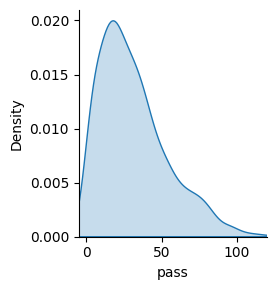

In [9]:
# basic displot - all on one line
g = (sns.FacetGrid(dfpm).map(sns.kdeplot, 'pass', fill=True))
g.set(xlim=(-5, 120))
plt.show()


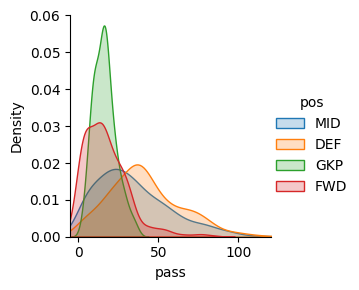

In [11]:
# hue
g = (sns.FacetGrid(dfpm, hue='pos')
     .map(sns.kdeplot, 'pass', fill=True)
     .add_legend()
     .set(xlim=(-5, 120)))
plt.show()

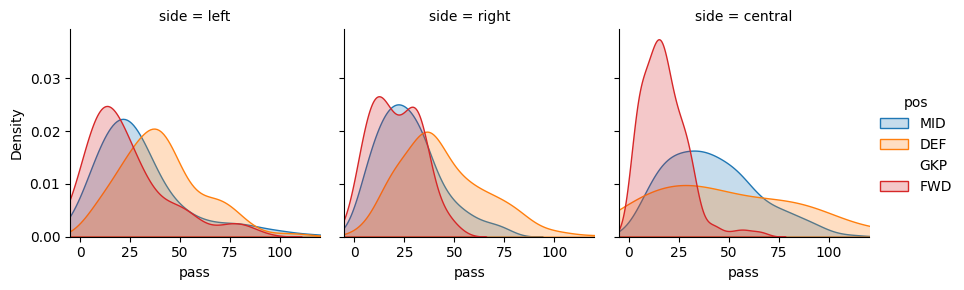

In [13]:
# add col
g = (sns.FacetGrid(dfpm, hue='pos', col='side')
     .map(sns.kdeplot, 'pass', fill=True)
     .add_legend()
     .set(xlim=(-5, 120)))

# add col_order 
# g = (sns.FacetGrid(dfpm, hue='pos', col='side', col_order=['left', 'central',
#                        'right'])
#      .map(sns.kdeplot, 'pass', shade=True)
#      .add_legend()
#      .set(xlim=(-5, 160)))

plt.show()


c:\Users\lukal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\lukal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\lukal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\lukal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprec

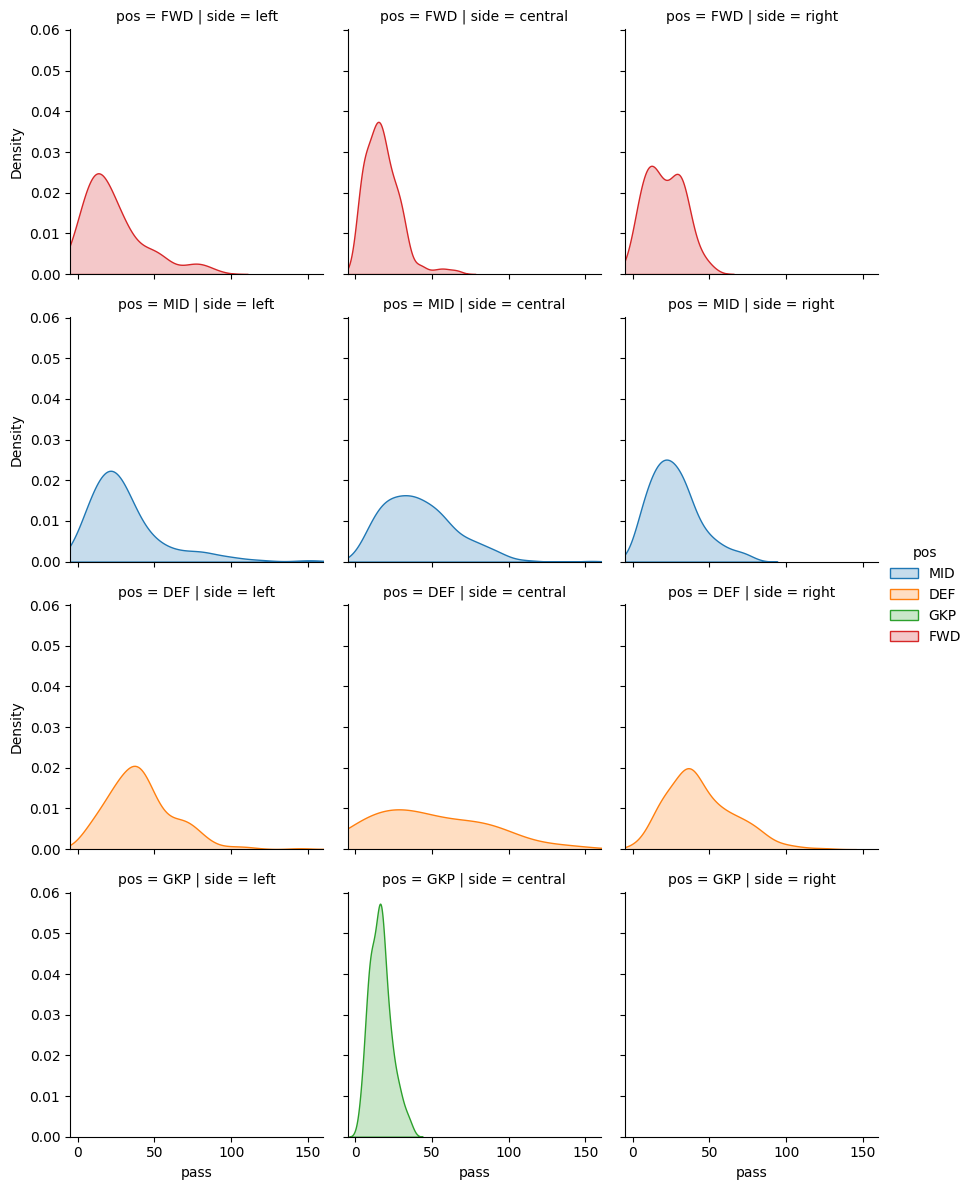

In [14]:
# rows
dfpm.loc[dfpm['pos'] == 'GKP', 'side'] = 'central'
g = (sns.FacetGrid(dfpm, hue='pos', col='side', row='pos',
                   col_order=['left', 'central', 'right'],
                   row_order=['FWD', 'MID', 'DEF', 'GKP'],
                   )
     .map(sns.kdeplot, 'pass', fill=True)
     .add_legend()
     .set(xlim=(-5, 160)))